In [1]:
import os
os.getcwd()
os.chdir('Downloads')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Read the dataset to the python environment.

In [3]:
data=pd.read_excel('iris.xls')
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# 2. Do necessary pre-processing steps.


# Filling missing value

In [7]:
data.isnull().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [8]:
for i in ['SL','SW','PL']:
    data[i]=data[i].fillna(data[i].median())

In [9]:
data.isnull().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

# Checking for outliers

Text(0.5, 1.0, 'boxplot of SL')

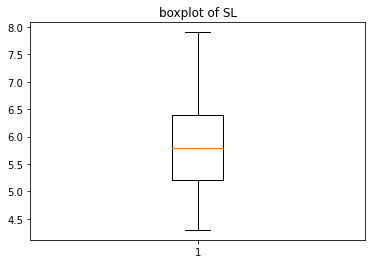

In [10]:
plt.boxplot(data['SL'])
plt.title('boxplot of SL')

Text(0.5, 1.0, 'boxplot of SW')

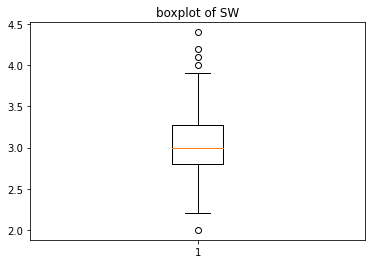

In [11]:
plt.boxplot(data['SW'])
plt.title('boxplot of SW')

In [12]:
Q1=data['SW'].quantile(0.25)
Q3=data['SW'].quantile(0.75)
IQR=Q3-Q1
print('Q1=',Q1)
print('Q3=',Q3)
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print('lower limit=',low_lim)
print('upper limit=',up_lim)

Q1= 2.8
Q3= 3.275
lower limit= 2.0874999999999995
upper limit= 3.9875


In [13]:
data['SW']=np.where(data['SW']>up_lim,up_lim,np.where(data['SW']<low_lim,low_lim,data['SW']))

Text(0.5, 1.0, 'boxplot of SW')

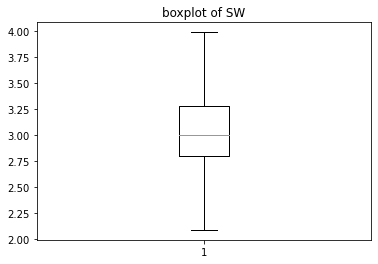

In [14]:
plt.boxplot(data['SW'])
plt.title('boxplot of SW')

Text(0.5, 1.0, 'boxplot of PL')

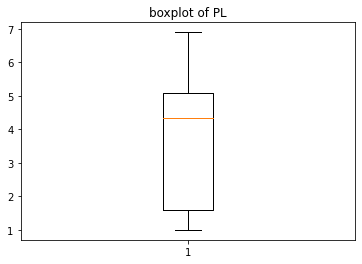

In [15]:
plt.boxplot(data['PL'])
plt.title('boxplot of PL')

Text(0.5, 1.0, 'boxplot of PW')

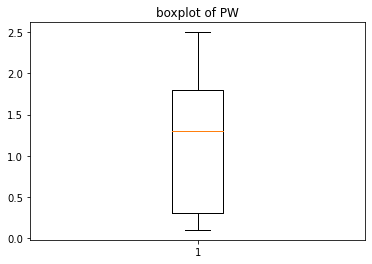

In [16]:
plt.boxplot(data['PW'])
plt.title('boxplot of PW')

All the outliers are removed.

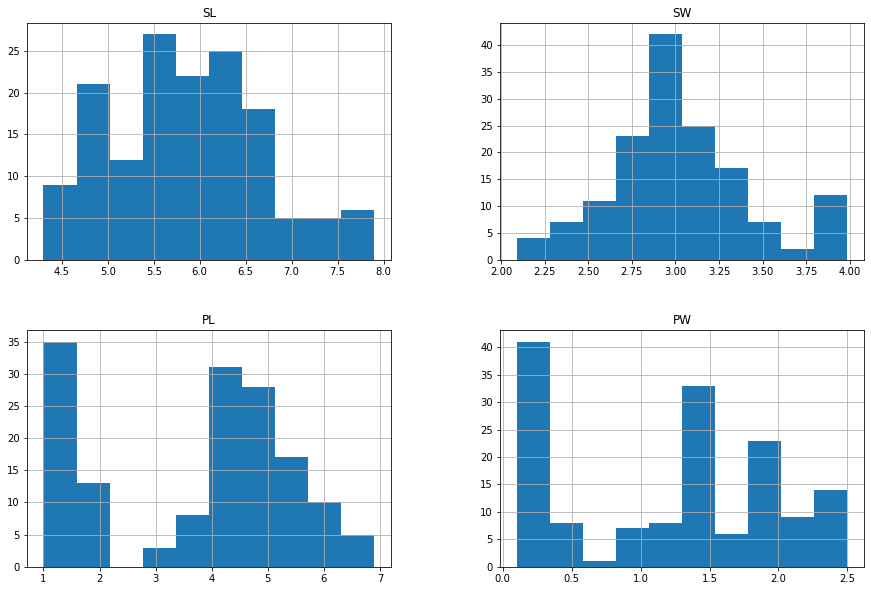

In [17]:
freqgraph=data.select_dtypes(include=['float'])
freqgraph.hist(figsize=(15,10))
plt.show()

# Standardization

In [18]:
x=data.drop('Classification',axis=1)

In [19]:
from sklearn import preprocessing
standardisation=preprocessing.StandardScaler()
df=standardisation.fit_transform(x)
df=pd.DataFrame(df)
df.describe()

,0,1,2,3
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-5.566381e-16,-2.421211e-16,1.421085e-16,9.251859e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.927530e+00,-2.353643e+00,-1.612857e+00,-1.444450e+00
25%,-8.107207e-01,-5.984185e-01,-1.264758e+00,-1.181504e+00
50%,-6.618128e-02,-1.057240e-01,3.306937e-01,1.332259e-01
75%,6.783581e-01,5.717309e-01,7.658171e-01,7.905908e-01
max,2.539707e+00,2.326955e+00,1.810113e+00,1.710902e+00


# 3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)


In [20]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Classification']=le.fit_transform(data['Classification'])
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.8,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [21]:
x=data.drop(columns=['Classification'])
y=data['Classification']

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.3)

In [23]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
print("Accuracy:",model.score(x_test,y_test)*100)

Accuracy: 97.77777777777777


# KNN model

In [25]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
model.fit(x_train,y_train)

KNeighborsClassifier()

In [26]:
print("Accuracy:",model.score(x_test,y_test)*100)

Accuracy: 97.77777777777777


# Decision tree

In [27]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [28]:
print("Accuracy:",model.score(x_test,y_test)*100)

Accuracy: 97.77777777777777


# SVM

In [29]:
from sklearn.svm import SVC
svm_linear=SVC(kernel='linear')
svm_linear.fit(x_train,y_train)

SVC(kernel='linear')

In [30]:
y_pred=svm_linear.predict(x_test)

In [31]:
print("Accuracy:",svm_linear.score(x_test,y_test)*100)

Accuracy: 97.77777777777777


In [32]:
svm_radial=SVC(kernel='rbf')
svm_radial.fit(x_train,y_train)

SVC()

In [33]:
y_pred=svm_radial.predict(x_test)
print("Accuracy:",svm_radial.score(x_test,y_test)*100)

Accuracy: 97.77777777777777


# Random forest 

In [34]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

In [35]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test,y_pred)*100)

Accuracy: 97.77777777777777
